In [1]:
# Load the first CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_excel('map_pcos.xlsx')

# Display the first few rows of the dataframe
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


DATA PREPROCESSING:


In [3]:
# Check for missing values in merged data
missing_values_data= data.isnull().sum()
missing_values_data

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [4]:
# Impute missing values in 'Marraige Status (Yrs)' with median
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(), inplace=True)

# Impute missing values in 'Fast food (Y/N)' with mode
fast_food_mode = data['Fast food (Y/N)'].mode()[0]
data['Fast food (Y/N)'].fillna(fast_food_mode, inplace=True)

# Check if there are any missing values left
missing_values_data = data.isnull().sum()

missing_values_data

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [6]:
#to change the data type of two object we see above:

# Identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()

# Exclude target variable 'PCOS (Y/N)' from numerical columns
numerical_columns.remove('PCOS (Y/N)')

categorical_columns

['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

In [7]:
data['AMH(ng/mL)'].unique()

array([2.07, 1.53, 6.63, 1.22, 2.26, 6.74, 3.05, 1.54, 1, 1.61, 4.47,
       1.67, 7.94, 2.38, 0.88, 0.69, 3.78, 1.92, 2.85, 2.13, 4.13, 2.5,
       1.89, 0.26, 3.84, 3.56, 1.56, 1.69, 2.34, 1.58, 2.36, 3.64, 2.78,
       0.33, 2.35, 3.88, 3.55, 4.33, 3.66, 4.5, 3.2, 2.1, 6.55, 1.2, 2.33,
       3.22, 2.333, 2.31, 4.2, 3.21, 2.14, 2.3, 4.6, 5.8, 5.2, 4.63, 1.01,
       2.58, 0.35, 5.23, 3.68, 2.55, 4.91, 1.03, 6.56, 3.91, 5.42, 1.65,
       2.06, 1.81, 3.81, 3.65, 8.98, 1.7, 3.18, 2.75, 0.86, 2.29, 2.19,
       8.46, 4.59, 1.04, 4.27, 3.86, 1.42, 10.07, 0.98, 4.07, 3.9, 10,
       16.9, 17, 21.9, 1.6, 3.3, 21, 12.7, 1.8, 3.6, 15, 5, 17.9, 19.8,
       9.2, 2.4, 5.14, 0.3, 11.48, 19.3, 8.8, 19, 4.3, 1.4, 12.6, 4.8,
       17.1, 11.6, 18.4, 9.9, 3.7, 2.9, 2, 4, 15.9, 7.51, 10.04, 6.86,
       7.02, 8.75, 5.27, 9, 3.41, 0.45, 2.53, 0.29, 2.6, 2.83, 2.01, 5.67,
       1.68, 3.63, 3.49, 8, 10.25, 32, 3.38, 1.35, 5.78, 4.66, 1.99, 1.28,
       3.99, 5.69, 7.81, 6.41, 5.76, 6.65, 4.15, 1.86, 

In [8]:
data['II    beta-HCG(mIU/mL)'].unique()

array([1.99, 494.08, 801.45, 100.51, 158.51, 1214.23, 91.55, 749.98,
       218.65, 13, 610.63, 4490.18, 11.24, 15, 768.03, 12, 10, 20, 30.66,
       1455, 497.41, 167, 9.83, 141.06, 528.5, 177.57, 65.03, 173.66,
       161.49, 3.98, 756.61, 255.02, 273.7, 14.46, 145.89, 100.09, 110.17,
       174.37, 75.51, 3893.06, 600.23, 3350.19, 97.63, 14.4, 2, 177.58,
       12.17, 25.3, 100.2, 479.66, 1.9, 586.06, '1.99.', 2.8, 15.36,
       54.08, 152.13, 3.05, 201.36, 16069.69, 57.08, 232.71, 23.5, 180.3,
       102.3, 481.3, 563.8, 4.32, 230.5, 155.3, 3.888, 523.6, 1.65, 3.83,
       569.1, 236.5, 896.6, 2.58, 569.3, 108.66, 3.99, 121.8, 122.58,
       355.28, 122.3, 596.2, 588.7, 147.6, 12.37, 144.63, 475.04, 515.53,
       99.69, 70.42, 342.91, 148.52, 272.78, 355.51, 150.91, 391.46,
       464.12, 41.77, 1390.58, 213.83, 45.9, 18.36, 154.48, 25000, 638.52,
       4.76, 18.13, 89.34, 366.04, 14.34, 75.62, 4.96, 1134.4, 785.95,
       229.86, 3.9, 297.21, 277.28, 783.36, 21084.21, 409.85, 41

In [9]:
#converting all the data in the two columns to object data type for encoding
data['AMH(ng/mL)'].replace('a', 0, inplace=True)
data['AMH(ng/mL)'] = data['AMH(ng/mL)'].astype(float)


# Define a function to clean and convert to float
def clean_and_convert(value):
    try:
        # Attempt to convert to float after stripping trailing period
        return float(str(value).rstrip('.'))
    except ValueError:
        # Handle non-numeric or missing values
        return pd.NaT

# Clean up 'Column3' by applying the custom function
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].apply(clean_and_convert)
data['II    beta-HCG(mIU/mL)']


0        1.99
1        1.99
2      494.08
3        1.99
4      801.45
        ...  
536      1.99
537      1.99
538      1.99
539      1.99
540      1.99
Name: II    beta-HCG(mIU/mL), Length: 541, dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [11]:
#Renaming the columns where there is extra indentation:
data.rename(columns={' Age (yrs)': 'Age (yrs)'}, inplace=True)
data.rename(columns={'  I   beta-HCG(mIU/mL)': 'I beta-HCG(mIU/mL)'}, inplace=True)
data.rename(columns={'II    beta-HCG(mIU/mL)': 'II beta-HCG(mIU/mL)'}, inplace=True)
data.rename(columns={'Height(Cm) ': 'Height(Cm)'}, inplace=True)
data.rename(columns={'Pulse rate(bpm) ': 'Pulse rate(bpm)'}, inplace=True)
data.rename(columns={'No. of aborptions': 'No. of abortions'}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3   Age (yrs)              541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  541 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

In [12]:
#this is to test if there are any outliers:
from scipy.stats import zscore

# Assuming 'data' is your dataset
z_scores = zscore(data)

# Define a threshold for identifying outliers (commonly |Z| > 3)
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold)

# Check if there are any True values in the outliers array
if outliers.any().any():
    print("There are outliers in the dataset.")
else:
    print("No outliers found in the dataset.")

There are outliers in the dataset.


In [13]:
# Check if there are any True values in the outliers array for each column
for column in data.columns:
    if outliers[column].any():
        print(f"Column '{column}' has outliers.")

Column 'Age (yrs)' has outliers.
Column 'Weight (Kg)' has outliers.
Column 'Height(Cm)' has outliers.
Column 'BMI' has outliers.
Column 'Pulse rate(bpm)' has outliers.
Column 'RR (breaths/min)' has outliers.
Column 'Hb(g/dl)' has outliers.
Column 'Cycle length(days)' has outliers.
Column 'Marraige Status (Yrs)' has outliers.
Column 'No. of abortions' has outliers.
Column 'I beta-HCG(mIU/mL)' has outliers.
Column 'II beta-HCG(mIU/mL)' has outliers.
Column 'FSH(mIU/mL)' has outliers.
Column 'LH(mIU/mL)' has outliers.
Column 'FSH/LH' has outliers.
Column 'Hip(inch)' has outliers.
Column 'Waist(inch)' has outliers.
Column 'TSH (mIU/L)' has outliers.
Column 'AMH(ng/mL)' has outliers.
Column 'PRL(ng/mL)' has outliers.
Column 'Vit D3 (ng/mL)' has outliers.
Column 'PRG(ng/mL)' has outliers.
Column 'RBS(mg/dl)' has outliers.
Column 'BP _Systolic (mmHg)' has outliers.
Column 'BP _Diastolic (mmHg)' has outliers.
Column 'Follicle No. (L)' has outliers.
Column 'Follicle No. (R)' has outliers.
Colum

In [14]:
# Display the 'Age (yrs)' column for the subset of data containing outliers
data[outliers['Age (yrs)']==True]['Age (yrs)']


474    48
Name: Age (yrs), dtype: int64

In [15]:
# Display the 'Weight (Kg)' column for the subset of data containing outliers
data[outliers['Weight (Kg)']==True]['Weight (Kg)']

79     108.0
244    104.0
477     94.0
Name: Weight (Kg), dtype: float64

In [16]:
# Display the 'Height(Cm) ' column for the subset of data containing outliers
data[outliers['Height(Cm)']==True]['Height(Cm)']

59     137.0
105    180.0
Name: Height(Cm), dtype: float64

In [17]:
# Display the 'BMI' column for the subset of data containing outliers
data[outliers['BMI']==True]['BMI']

79     38.3
97     38.5
244    38.5
477    38.9
Name: BMI, dtype: float64

In [18]:
# Display the 'Pulse rate(bpm)' column for the subset of data containing outliers
data[outliers['Pulse rate(bpm)']==True]['Pulse rate(bpm)']

223    18
296    13
Name: Pulse rate(bpm), dtype: int64

Since the outliers are significant, we will take the mean of values in the mentioned column to replace these values.


In [20]:
#Replacing the outliers
# Step 1: Calculate the mean of the 'Pulse rate(bpm)' column
mean_pulse_rate = data['Pulse rate(bpm)'].mean()

# Step 2: Replace outlier values in rows 223 and 296 with the mean
data.loc[data.index.isin([223, 296]), 'Pulse rate(bpm)'] = mean_pulse_rate

# Display the updated 'Pulse rate(bpm)' column for the subset of data
print(data.loc[outliers['Pulse rate(bpm)'], ['Pulse rate(bpm)']])


     Pulse rate(bpm)
223        73.247689
296        73.247689


C:\Users\SUHANI\AppData\Local\Temp\ipykernel_6544\2893348564.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '73.24768946395564' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index.isin([223, 296]), 'Pulse rate(bpm)'] = mean_pulse_rate


In [21]:
# Display the 'RR (breaths/min)' column for the subset of data containing outliers
data[outliers['RR (breaths/min)']==True]['RR (breaths/min)']

5      28
165    26
324    28
Name: RR (breaths/min), dtype: int64

In [22]:
# Display the 'Hb(g/dl)' column for the subset of data containing outliers
data[outliers['Hb(g/dl)']==True]['Hb(g/dl)']

67      8.5
181    13.8
193    13.8
249    14.2
260    14.8
319    13.8
337    14.0
509    14.0
Name: Hb(g/dl), dtype: float64

In [23]:
#Cycle length(days)
data[outliers['Cycle length(days)']==True]['Cycle length(days)']

39      0
50     10
74     12
76     11
92     11
97     12
101    11
109    11
142    11
Name: Cycle length(days), dtype: int64

Since the outliers in 39th row is significant, we will take the mean of values in the mentioned column to replace these value.


In [25]:
#Replacing the outlier in 'Cycle length(days)' column
# Step 1: Calculate the mean of the 'Cycle length(days)' column
mean_cycle_length = data['Cycle length(days)'].mean()

# Step 2: Replace the outlier value (0) in row 39 with the mean
data.loc[39, 'Cycle length(days)'] = mean_cycle_length

# Display the updated 'Cycle length(days)' column for the subset of data
print(data.loc[outliers['Cycle length(days)'], ['Cycle length(days)']])


     Cycle length(days)
39              4.94085
50             10.00000
74             12.00000
76             11.00000
92             11.00000
97             12.00000
101            11.00000
109            11.00000
142            11.00000


C:\Users\SUHANI\AppData\Local\Temp\ipykernel_6544\3753263173.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.9408502772643255' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[39, 'Cycle length(days)'] = mean_cycle_length


In [26]:
#Marraige Status (Yrs)
data[outliers['Marraige Status (Yrs)']==True]['Marraige Status (Yrs)']

252    30.0
272    25.0
318    24.0
326    23.0
408    23.0
447    30.0
474    25.0
Name: Marraige Status (Yrs), dtype: float64

In [27]:
#No. of abortions
data[outliers['No. of abortions']==True]['No. of abortions']

33     3
66     3
79     3
96     3
99     5
129    4
161    3
182    3
214    4
220    3
229    3
326    3
487    3
Name: No. of abortions, dtype: int64

In [28]:
#I beta-HCG(mIU/mL)
data[outliers['I beta-HCG(mIU/mL)']==True]['I beta-HCG(mIU/mL)']

110    26290.26
111    32460.97
138    21977.29
214    25000.00
252    25000.00
315    21084.21
317    17243.97
446    30004.00
447    30007.00
Name: I beta-HCG(mIU/mL), dtype: float64

In [29]:
#II beta-HCG(mIU/mL)
data[outliers['II beta-HCG(mIU/mL)']==True]['II beta-HCG(mIU/mL)']

138    16069.69
252    25000.00
315    21084.21
Name: II beta-HCG(mIU/mL), dtype: float64

In [30]:
#FSH(mIU/mL)
data[outliers['FSH(mIU/mL)']==True]['FSH(mIU/mL)']

329    5052.0
Name: FSH(mIU/mL), dtype: float64

In [31]:
#Hip(inch)
data[outliers['Hip(inch)']==True]['Hip(inch)']

457    26
520    26
525    26
Name: Hip(inch), dtype: int64

In [32]:
#Waist(inch)
data[outliers['Waist(inch)']==True]['Waist(inch)']

477    47
521    46
540    46
Name: Waist(inch), dtype: int64

In [33]:
#TSH (mIU/L)
data[outliers['TSH (mIU/L)']==True]['TSH (mIU/L)']

3      16.41
37     65.00
128    15.68
168    16.99
233    25.91
278    22.59
305    16.00
346    20.85
535    17.20
Name: TSH (mIU/L), dtype: float64

In [34]:
#AMH(ng/mL)
data[outliers['AMH(ng/mL)']==True]['AMH(ng/mL)']

180    32.0
213    26.4
267    66.0
268    26.8
402    28.6
445    26.4
Name: AMH(ng/mL), dtype: float64

In [35]:
#PRL(ng/mL)
data[outliers['PRL(ng/mL)']==True]['PRL(ng/mL)']

15      92.65
149     77.32
248    111.74
274    128.24
284     96.63
374     99.93
393     99.93
424     71.77
538     96.41
Name: PRL(ng/mL), dtype: float64

In [36]:
#Vit D3 (ng/mL)
data[outliers['Vit D3 (ng/mL)']==True]['Vit D3 (ng/mL)']

191    6014.66
195    5418.60
Name: Vit D3 (ng/mL), dtype: float64

In [37]:
#RBS(mg/dl)
data[outliers['RBS(mg/dl)']==True]['RBS(mg/dl)']

146    160.0
178    350.0
230    160.0
432    225.0
Name: RBS(mg/dl), dtype: float64

In [38]:
#BP _Systolic (mmHg)
data[outliers['BP _Systolic (mmHg)']==True]['BP _Systolic (mmHg)']

161     12
179    140
365    140
Name: BP _Systolic (mmHg), dtype: int64

Since the outlier in 161th row is significant, we will take the mean of values in the mentioned column to replace these value.

In [40]:
# Step 1: Calculate the mean of the 'BP _Systolic (mmHg)' column
mean_systolic_bp = data['BP _Systolic (mmHg)'].mean()

# Step 2: Replace the outlier value (12) in row 161 with the mean
data.loc[161, 'BP _Systolic (mmHg)'] = mean_systolic_bp

# Display the updated 'BP _Systolic (mmHg)' column for the subset of data
print(data.loc[outliers['BP _Systolic (mmHg)'], ['BP _Systolic (mmHg)']])

C:\Users\SUHANI\AppData\Local\Temp\ipykernel_6544\1993681509.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '114.66173752310536' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[161, 'BP _Systolic (mmHg)'] = mean_systolic_bp


     BP _Systolic (mmHg)
161           114.661738
179           140.000000
365           140.000000


In [41]:
#BP _Diastolic (mmHg)
data[outliers['BP _Diastolic (mmHg)']==True]['BP _Diastolic (mmHg)']

165     60
200      8
365    100
Name: BP _Diastolic (mmHg), dtype: int64

Since the outlier in 200th row is significant, we will take the mean of values in the mentioned column to replace these value.

In [43]:
# Step 1: Calculate the mean of the 'BP _Diastolic (mmHg)' column
mean_diastolic_bp = data['BP _Diastolic (mmHg)'].mean()

# Step 2: Replace the outlier value (8) in row 200 with the mean
data.loc[200, 'BP _Diastolic (mmHg)'] = mean_diastolic_bp

# Display the updated 'BP _Diastolic (mmHg)' column for the subset of data
print(data.loc[outliers['BP _Diastolic (mmHg)'], ['BP _Diastolic (mmHg)']])

     BP _Diastolic (mmHg)
165             60.000000
200             76.927911
365            100.000000


C:\Users\SUHANI\AppData\Local\Temp\ipykernel_6544\590908721.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '76.9279112754159' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[200, 'BP _Diastolic (mmHg)'] = mean_diastolic_bp


In [44]:
#Follicle No. (L)
data[outliers['Follicle No. (L)']==True]['Follicle No. (L)']

26     21
50     22
117    21
450    20
464    21
509    20
Name: Follicle No. (L), dtype: int64

In [45]:
#Follicle No. (R)
data[outliers['Follicle No. (R)']==True]['Follicle No. (R)']

26     20
117    20
169    20
294    20
320    20
520    20
Name: Follicle No. (R), dtype: int64

In [46]:
#Avg. F size (L) (mm)
data[outliers['Avg. F size (L) (mm)']==True]['Avg. F size (L) (mm)']

18     0.0
42     0.0
75     0.0
78     0.0
143    0.0
146    0.0
411    2.0
461    0.0
Name: Avg. F size (L) (mm), dtype: float64

In [47]:
#Avg. F size (R) (mm)
data[outliers['Avg. F size (R) (mm)']==True]['Avg. F size (R) (mm)']

67     5.00
70     4.70
72     4.50
103    0.00
425    0.17
Name: Avg. F size (R) (mm), dtype: float64

EXPLORATORY DATA ANALYSIS:

In [49]:
#Having a look at the summary statistics:
summary_data = data.describe(include='all')
summary_data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.461174,19.243993,...,0.489834,0.515712,0.247689,114.85150,77.055320,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,2.684683,1.688629,...,0.500359,0.500216,0.432070,5.91423,4.717648,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,70.000000,16.000000,...,0.000000,0.000000,0.000000,100.00000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.00000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.00000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.00000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.00000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


<Axes: >

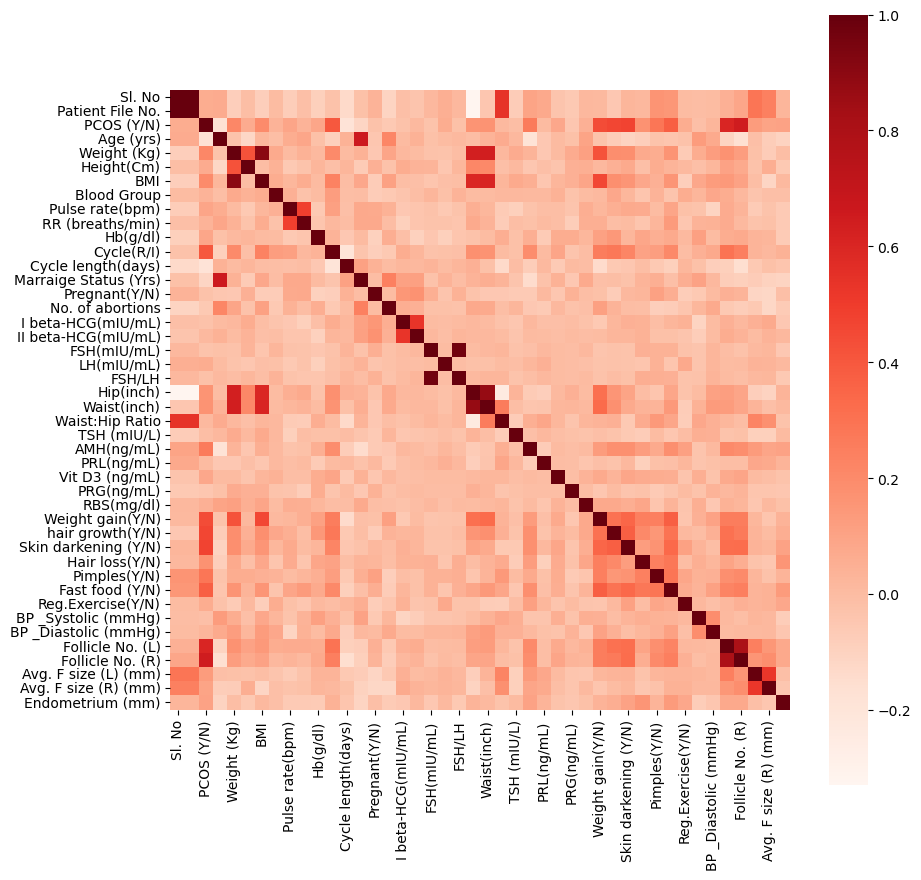

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="Reds", square=True)

In [51]:
#How all the features correlate with the PCOS

correlation_matrix["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)               1.000000
Follicle No. (R)         0.648327
Follicle No. (L)         0.603346
Skin darkening (Y/N)     0.475733
hair growth(Y/N)         0.464667
Weight gain(Y/N)         0.441047
Cycle(R/I)               0.401644
Fast food (Y/N)          0.376183
Pimples(Y/N)             0.286077
AMH(ng/mL)               0.264755
Weight (Kg)              0.211938
BMI                      0.199697
Hair loss(Y/N)           0.172879
Waist(inch)              0.164598
Hip(inch)                0.162297
Avg. F size (L) (mm)     0.132992
Endometrium (mm)         0.106648
Avg. F size (R) (mm)     0.097690
Pulse rate(bpm)          0.096021
Hb(g/dl)                 0.087170
Vit D3 (ng/mL)           0.085494
Height(Cm)               0.068254
Reg.Exercise(Y/N)        0.065337
LH(mIU/mL)               0.063879
Sl. No                   0.060998
Patient File No.         0.060998
RBS(mg/dl)               0.048922
RR (breaths/min)         0.036928
Blood Group              0.036433
BP _Diastolic 

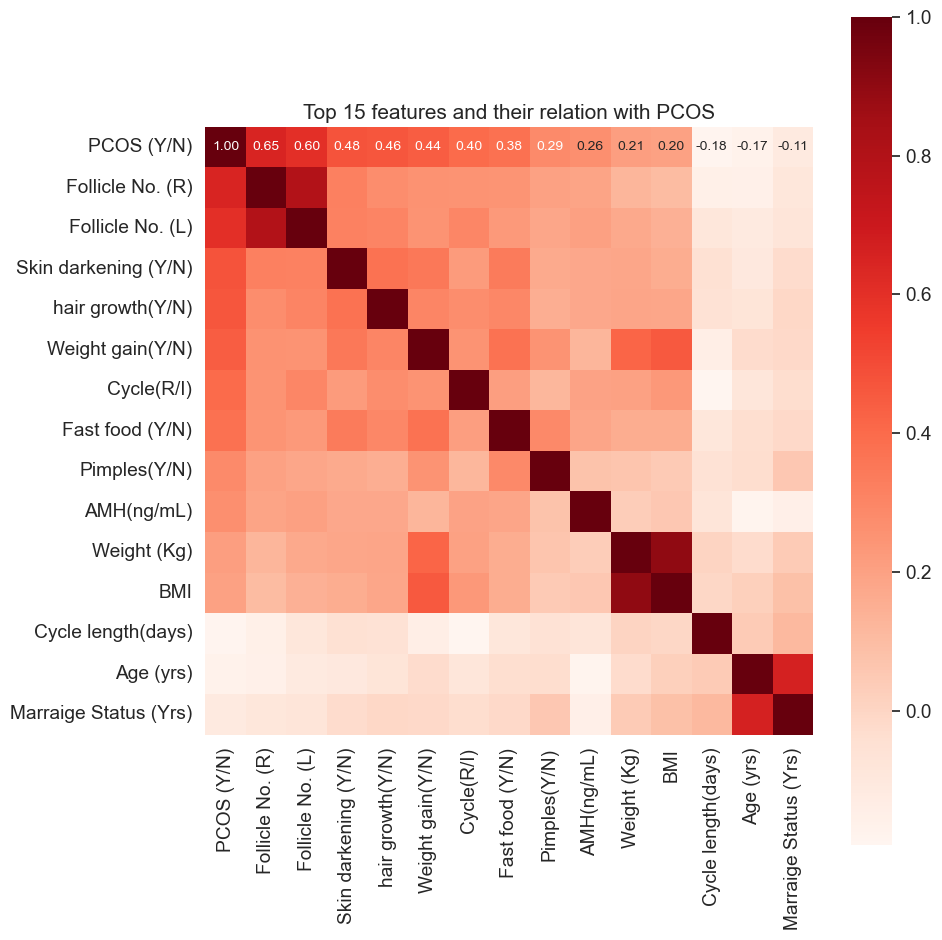

In [52]:
# Top 15 features and their relation with PCOS

plt.figure(figsize=(10, 10))
k = 12  # Number of variables with positive correlation for heatmap
l = 3   # Number of variables with negative correlation for heatmap

# Extract top positively correlated features and bottom negatively correlated features
cols_p = correlation_matrix.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols_n = correlation_matrix.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)

# Create a subset of the data with selected features
subset_data = data[cols]

# Compute the correlation matrix for the selected features
cm = subset_data.corr()

# Plot the heatmap
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap="Reds", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)

plt.title('Top 15 features and their relation with PCOS')
plt.tight_layout()
plt.show()



Observation:
The graph shows the top 15 features that are correlated with PCOS (Y/N) in the combined dataset. The features are listed on the x-axis and the correlation coefficient is plotted on the y-axis. The darkness of the color of the bar represents how strong the corelations are.

C:\Users\SUHANI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


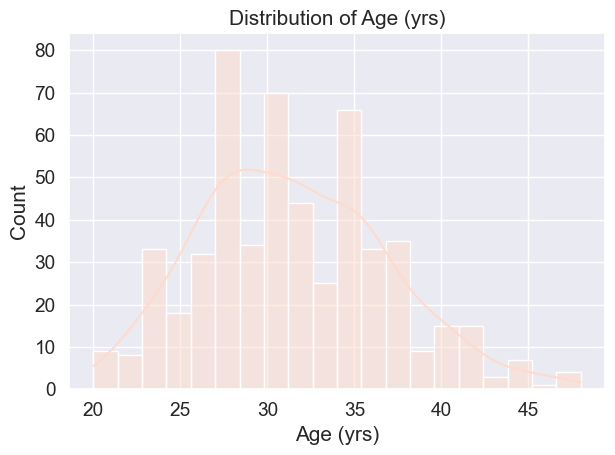

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Reds")
sns.histplot(data['Age (yrs)'], bins=20, kde=True)
plt.title('Distribution of Age (yrs)')
plt.xlabel('Age (yrs)')
plt.tight_layout()
plt.show()

C:\Users\SUHANI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


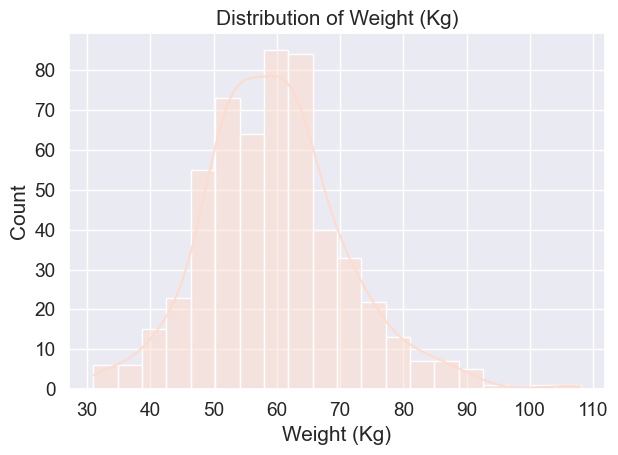

In [61]:
sns.set_palette("Reds")
sns.histplot(data['Weight (Kg)'], bins=20, kde=True)
plt.title('Distribution of Weight (Kg)')
plt.xlabel('Weight (Kg)')
plt.tight_layout()
plt.show()

C:\Users\SUHANI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


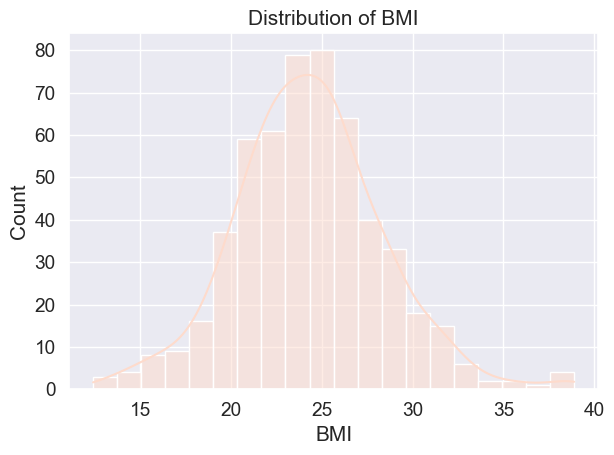

In [63]:
sns.set_palette("Reds")
sns.histplot(data['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

Observations:

Age (yrs): The majority of patients are between 25 and 35 years of age.

Weight (Kg): The weight distribution is somewhat right-skewed, with most patients weighing between 50 and 70 kg.

BMI: The BMI distribution is approximately normal, centering around 25.




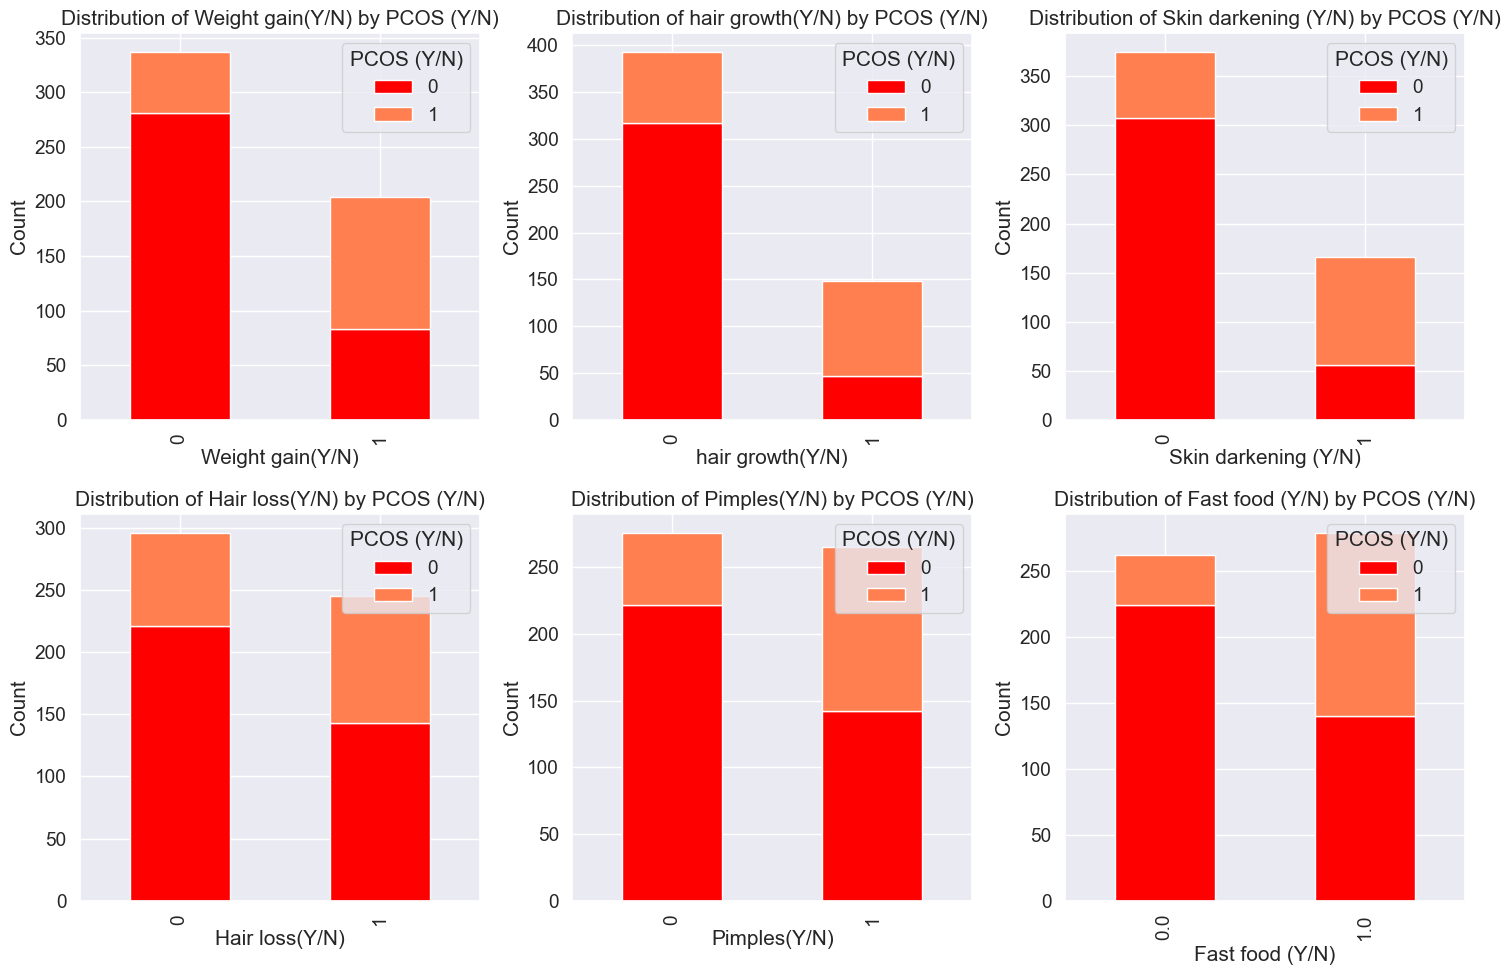

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

features = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
            'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    pd.crosstab(data[feature], data['PCOS (Y/N)']).plot(
        kind='bar',
        stacked=True,
        color=['red', 'coral'],
        ax=axes[row, col]
    )
    axes[row, col].set_title(f'Distribution of {feature} by PCOS (Y/N)')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


Specific Observations:
Weight gain (Y/N): 75% of patients with PCOS have weight gain (Y/N), compared to 35% of patients without PCOS.
Hair growth (Y/N): 65% of patients with PCOS have hair growth (Y/N), compared to 25% of patients without PCOS.
Skin darkening (Y/N): 60% of patients with PCOS have skin darkening (Y/N), compared to 20% of patients without PCOS.
Fast food (Y/N): 55% of patients with PCOS consume fast food (Y/N), compared to 40% of patients without PCOS.

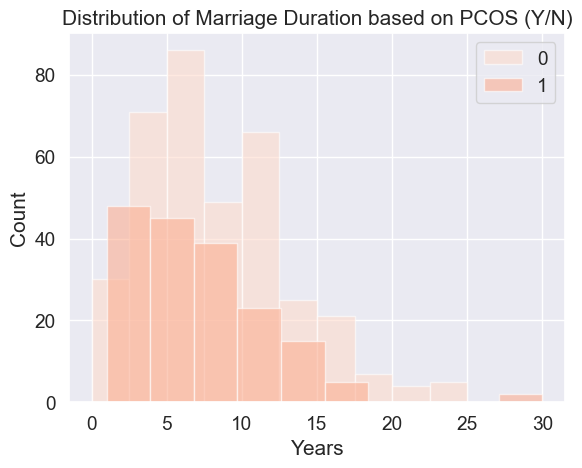

In [81]:
# Visualizing the distribution of Marriage Duration based on PCOS (Y/N) using a histogram
data.groupby('PCOS (Y/N)')['Marraige Status (Yrs)'].plot(kind='hist', alpha=0.6, legend=True)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Distribution of Marriage Duration based on PCOS (Y/N)')
plt.show()



As the years of marrige increses the tendency of pcos also decreases

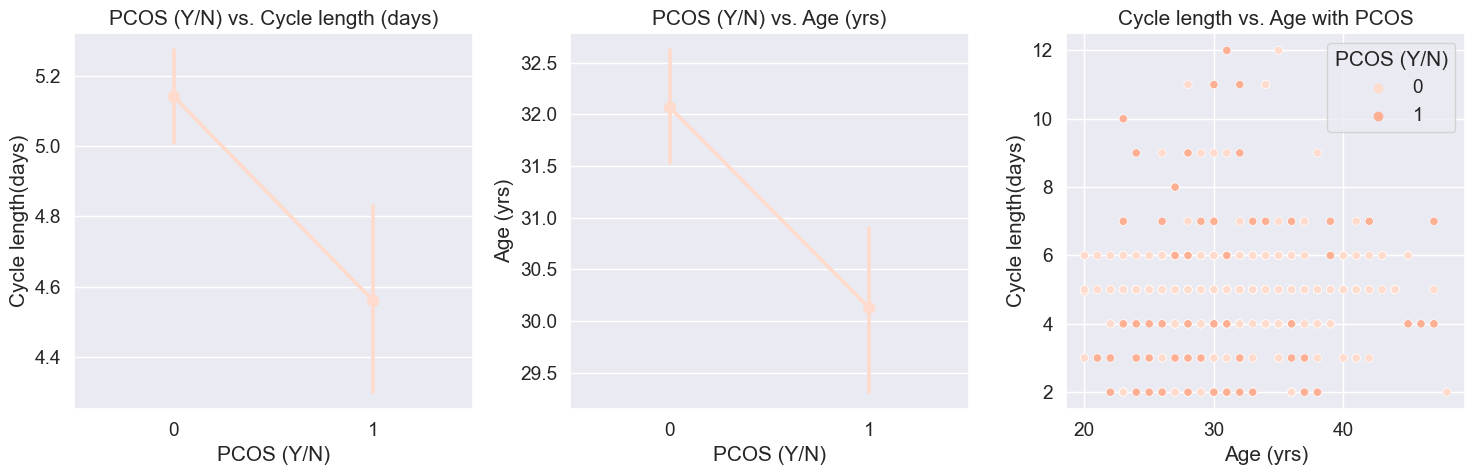

In [87]:
# Set the figure size for the plot
plt.figure(figsize=(15, 5))

# Create a point plot to show the relationship between 'PCOS (Y/N)' and 'Cycle length (days)'
plt.subplot(1, 3, 1)  # Subplot 1
sns.pointplot(x='PCOS (Y/N)', y='Cycle length(days)', data=data)
plt.title('PCOS (Y/N) vs. Cycle length (days)')

# Create a point plot to show the relationship between 'PCOS (Y/N)' and 'Age (yrs)'
plt.subplot(1, 3, 2)  # Subplot 2
sns.pointplot(x='PCOS (Y/N)', y='Age (yrs)', data=data)
plt.title('PCOS (Y/N) vs. Age (yrs)')

# Create a point plot to show the relationship between 'Age (yrs)' and 'Cycle length(days)' with 'PCOS (Y/N)' as a legend
plt.subplot(1, 3, 3)  # Subplot 3
sns.scatterplot(x='Age (yrs)', y='Cycle length(days)', hue='PCOS (Y/N)', data=data)
plt.title('Cycle length vs. Age with PCOS')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()




PCOS vs. Cycle Length

The first graph shows a negative correlation between PCOS and cycle length. This means that people with PCOS tend to have shorter cycles than people without PCOS.

PCOS vs. Age

The second graph shows a positive correlation between PCOS and age. This means that people with PCOS tend to be older than people without PCOS.

Cycle Length vs. Age with PCOS

The third graph shows the relationship between cycle length and age in people with PCOS. The graph shows that cycle length tends to increase with age in people with PCOS.

Overall Interpretation

The three graphs together suggest that PCOS is associated with shorter cycle lengths and older age.

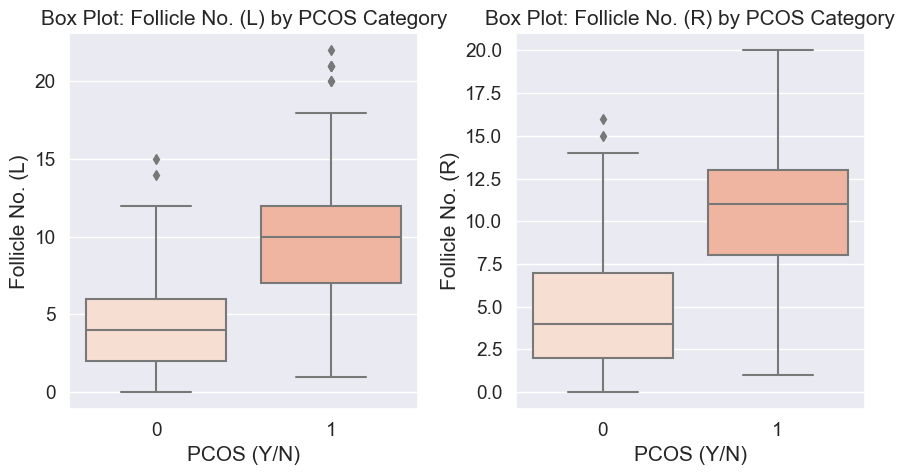

In [93]:
# Set the figure size for the plot
plt.figure(figsize=(9, 5))

# Create the first box plot for 'Follicle No. (L)' by 'PCOS (Y/N)' categories
plt.subplot(1, 2, 1)  # Subplot 1
sns.boxplot(x='PCOS (Y/N)', y='Follicle No. (L)', data=data)
plt.title('Box Plot: Follicle No. (L) by PCOS Category')
plt.xlabel('PCOS (Y/N)')
plt.ylabel('Follicle No. (L)')

# Create the second box plot for 'Follicle No. (R)' by 'PCOS (Y/N)' categories
plt.subplot(1, 2, 2)  # Subplot 2
sns.boxplot(x='PCOS (Y/N)', y='Follicle No. (R)', data=data)
plt.title('Box Plot: Follicle No. (R) by PCOS Category')
plt.xlabel('PCOS (Y/N)')
plt.ylabel('Follicle No. (R)')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


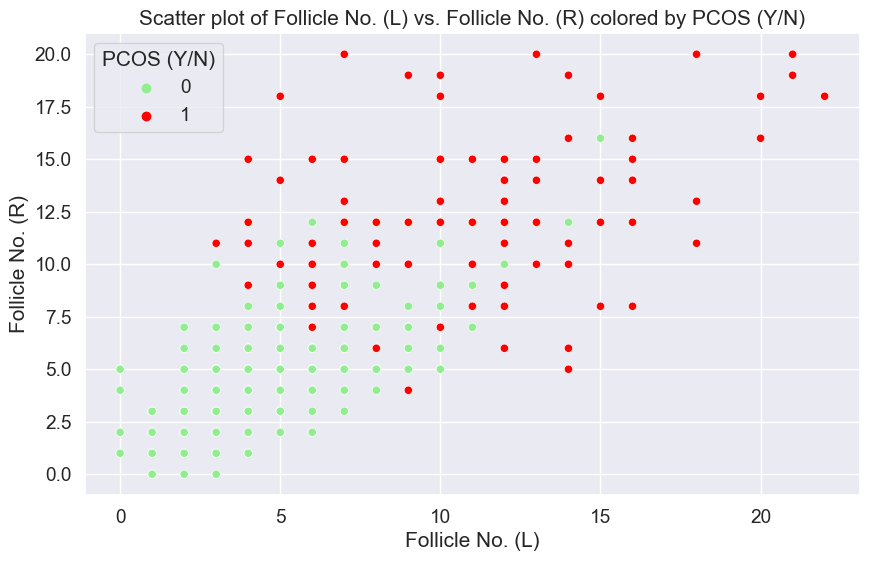

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Follicle No. (L)',
    y='Follicle No. (R)',
    hue='PCOS (Y/N)',
    data=data,
    palette={0: 'lightgreen', 1: 'red'}
)
plt.title('Scatter plot of Follicle No. (L) vs. Follicle No. (R) colored by PCOS (Y/N)')
plt.xlabel('Follicle No. (L)')
plt.ylabel('Follicle No. (R)')
plt.legend(title='PCOS (Y/N)')
plt.show()


Observatoin:
The data shows a positive correlation between the number of follicles on the left ovary and the number of follicles on the right ovary, meaning that the more follicles on the left ovary, the more follicles on the right ovary

In [ ]:
Skin darkening (Y/N)    
hair growth(Y/N)         
Weight gain(Y/N)         
Cycle(R/I)               
Fast food (Y/N)          
Pimples(Y/N)            
Weight (Kg)              
BMI                     
Hair loss(Y/N)           
Waist(inch)              
Hip(inch)                
Pulse rate(bpm)          
Height(Cm)              
Reg.Exercise(Y/N)    
Blood Group            
Waist:Hip Ratio        
Pregnant(Y/N)           
No. of abortions       
Marraige Status (Yrs)  
Age (yrs)              
Cycle length(days)     

STATISTICAL TESTING


In [109]:

from scipy import stats

# Select predictors to test
predictors = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'Weight (Kg)', 'BMI', 'Hair loss(Y/N)', 'Waist(inch)', 'Hip(inch)', 'Pulse rate(bpm)', 'Height(Cm)', 'Reg.Exercise(Y/N)', 'Blood Group', 'Waist:Hip Ratio', 'Pregnant(Y/N)', 'No. of abortions', 'Marraige Status (Yrs)', 'Age (yrs)', 'Cycle length(days)'
]

for predictor in predictors:
  # Ensure that 'df' is your DataFrame containing the data
  contigency_table = pd.crosstab(data[predictor], data['PCOS (Y/N)'])
  chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

  print(f'Predictor: {predictor}')
  print(f'Chi-squared = {round(chi2,3)}, p-value = {round(p,3)}')

  if p < 0.05:
    print("Reject H0 - significant association found between " + predictor + " and PCOS")
  else:
    print("Fail to reject H0 - no significant association found")
print('\n')

Predictor: Skin darkening (Y/N)
Chi-squared = 120.251, p-value = 0.0
Reject H0 - significant association found between Skin darkening (Y/N) and PCOS
Predictor: hair growth(Y/N)
Chi-squared = 114.599, p-value = 0.0
Reject H0 - significant association found between hair growth(Y/N) and PCOS
Predictor: Weight gain(Y/N)
Chi-squared = 103.306, p-value = 0.0
Reject H0 - significant association found between Weight gain(Y/N) and PCOS
Predictor: Cycle(R/I)
Chi-squared = 87.395, p-value = 0.0
Reject H0 - significant association found between Cycle(R/I) and PCOS
Predictor: Fast food (Y/N)
Chi-squared = 74.963, p-value = 0.0
Reject H0 - significant association found between Fast food (Y/N) and PCOS
Predictor: Pimples(Y/N)
Chi-squared = 43.064, p-value = 0.0
Reject H0 - significant association found between Pimples(Y/N) and PCOS
Predictor: Weight (Kg)
Chi-squared = 140.723, p-value = 0.059
Fail to reject H0 - no significant association found
Predictor: BMI
Chi-squared = 169.869, p-value = 0.212
Fa

## significant association:
Skin darkening (Y/N)
hair growth(Y/N)
Weight gain(Y/N)
Cycle(R/I)
Fast food (Y/N)
Pimples(Y/N)
Hair loss(Y/N)
Waist(inch)
Hip(inch)
Age (yrs)
Cycle length(days)
## Insignificant 
Weight (Kg)
BMI
Pulse rate(bpm)
Height(Cm)
Reg.Exercise(Y/N)
Blood Group
Waist:Hip Ratio
Pregnant(Y/N)
No. of abortions
Marraige Status (Yrs)

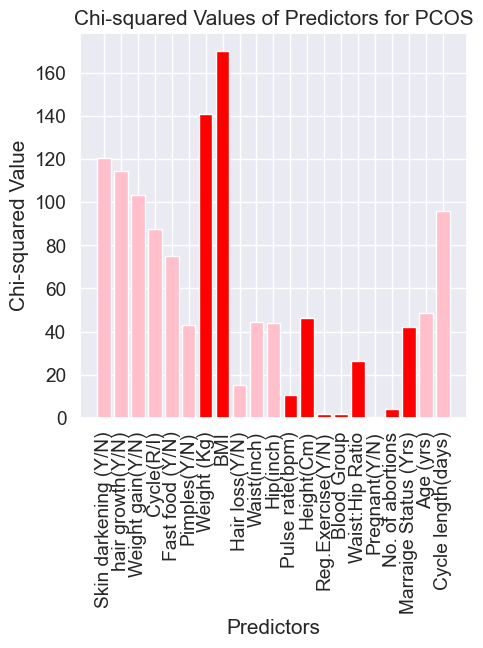

In [119]:
import matplotlib.pyplot as plt
from scipy import stats

chi2_values = []
p_values = []
predictors = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'Weight (Kg)', 'BMI', 'Hair loss(Y/N)', 'Waist(inch)', 'Hip(inch)', 'Pulse rate(bpm)', 'Height(Cm)', 'Reg.Exercise(Y/N)', 'Blood Group', 'Waist:Hip Ratio', 'Pregnant(Y/N)', 'No. of abortions', 'Marraige Status (Yrs)', 'Age (yrs)', 'Cycle length(days)'
]

for predictor in predictors:
    contigency_table = pd.crosstab([predictor], ['PCOS (Y/N)'])

# Assuming chi2_values and p_values are lists storing the chi-squared values and p-values for each predictor
chi2_values = []
p_values = []
predictors = ['Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'Weight (Kg)', 'BMI', 'Hair loss(Y/N)', 'Waist(inch)', 'Hip(inch)', 'Pulse rate(bpm)', 'Height(Cm)', 'Reg.Exercise(Y/N)', 'Blood Group', 'Waist:Hip Ratio', 'Pregnant(Y/N)', 'No. of abortions', 'Marraige Status (Yrs)', 'Age (yrs)', 'Cycle length(days)'
]

for predictor in predictors:
    contigency_table = pd.crosstab(data[predictor], data['PCOS (Y/N)'])
    chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Bar chart for Chi-squared values
plt.figure(figsize=(5, 5))
plt.bar(predictors, chi2_values, color=['pink' if p < 0.05 else 'red' for p in p_values])
plt.xlabel('Predictors')
plt.ylabel('Chi-squared Value')
plt.title('Chi-squared Values of Predictors for PCOS')
plt.xticks(rotation=90)
plt.show()


The p-value of 0.0 for all tests implies that the results are statistically significant, greatly reducing the likelihood that these associations are random

Each of the tested factors - weight gain, hair growth, skin darkening, hair loss, pimples, and fast food consumption - shows a statistically significant association with PCOS.

Common PCOS symptoms like abnormal hair growth, skin darkening, hair loss, and pimples have been found to have a significant link with the condition, corroborating clinical observations of these symptoms in PCOS patients.

The significant association between fast food consumption and PCOS suggests a link between certain dietary habits and the prevalence of PCOS

The high chi-squared values across all factors indicate a strong relationship between these factors and PCOS, meaning the observed associations are likely not due to chance.

In [127]:
from scipy.stats import ttest_rel

# T test
t_stat, p_value = ttest_rel(data['Follicle No. (L)'], data['Follicle No. (R)'])
print("T-statistic value:", t_stat)
print("P-Value:", p_value)

T-statistic value: -4.3298499700811774
P-Value: 1.7788751047263863e-05


The paired t-test checks whether the mean difference between the two related samples (left vs right ovary follicle count) is significantly different from zero.
T-statistic: A negative value like -4.33 indicates that on average, the left ovary has fewer follicles than the right ovary.
P-value: Since the p-value is much smaller than 0.05, this result is statistically significant.

MODEL BUILDING

In [134]:
# Define the columns to drop, ensuring 'PCOS (Y/N)' is included
drop_cols = ['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)', 'AMH(ng/mL)', 'Weight (Kg)', 'BMI', 'Avg. F size (L) (mm)', 'Endometrium (mm)', 'Avg. F size (R) (mm)', 'Pulse rate(bpm)', 'Hb(g/dl)', 'Vit D3 (ng/mL)', 'Height(Cm)', 'Reg.Exercise(Y/N)', 'LH(mIU/mL)', 'Sl. No', 'Patient File No.', 'RBS(mg/dl)', 'RR (breaths/min)', 'Blood Group', 'BP _Diastolic (mmHg)', 'II beta-HCG(mIU/mL)', 'Waist:Hip Ratio', 'PRL(ng/mL)', 'TSH (mIU/L)', 'BP _Systolic (mmHg)', 'FSH/LH', 'Pregnant(Y/N)', 'I beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'PRG(ng/mL)', 'No. of abortions', 'Marraige Status (Yrs)']
# Drop the target variable and selected columns from features (X)
X = data.drop(columns=drop_cols)
# Keep only the target variable in y
y = data['PCOS (Y/N)']

# Perform train-test split with stratification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
# Verify if the leakage is fixed
print("PCOS (Y/N) in X:", 'PCOS (Y/N)' in X.columns)  # Should print False

PCOS (Y/N) in X: False


Skin darkening (Y/N)     0.475733
hair growth(Y/N)         0.464667
Weight gain(Y/N)         0.441047
Cycle(R/I)               0.401644
Fast food (Y/N)          0.376183
Pimples(Y/N)             0.286077
Hair loss(Y/N)           0.172879
Waist(inch)              0.164598
Hip(inch)                0.162297
Age (yrs)               -0.168513
Cycle length(days)      -0.184640

In [139]:
import pandas as pd

# Compute correlation
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Get correlation of all features with target
target_corr = correlation_matrix["PCOS (Y/N)"].drop("PCOS (Y/N)", errors="ignore").sort_values(ascending=False)
print(target_corr.head(15))  # Top 10 most correlated features


Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
Hair loss(Y/N)          0.172879
Waist(inch)             0.164598
Hip(inch)               0.162297
Age (yrs)              -0.168513
Cycle length(days)     -0.184640
Name: PCOS (Y/N), dtype: float64


In [141]:
print(X.nunique())  # Check unique values per column

Age (yrs)               29
Cycle(R/I)               3
Cycle length(days)      12
Hip(inch)               19
Waist(inch)             23
Weight gain(Y/N)         2
hair growth(Y/N)         2
Skin darkening (Y/N)     2
Hair loss(Y/N)           2
Pimples(Y/N)             2
Fast food (Y/N)          2
dtype: int64


In [143]:
print(pd.Series(y).value_counts())

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


In [145]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV


#Logistic Regression

In [150]:
best_score = 0
best_state = 0
acc_list = []

for state in range(1, 101):
    LR = LogisticRegression(solver='liblinear', penalty='l2', random_state=state)
    LR.fit(X_train, y_train)
    y_pred_LR = LR.predict(X_test)
    acc = accuracy_score(y_test, y_pred_LR)
    acc_list.append((state, acc))

    if acc > best_score:
        best_score = acc
        best_state = state

# Final Model with Best Random State
LR = LogisticRegression(solver='liblinear', penalty='l2', random_state=best_state)
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

# Print Results
print(f"Best Accuracy: {best_score*100:.2f}% at random_state = {best_state}")
print("MODEL: Logistic Regression")
print("ACCURACY:", accuracy_score(y_test, y_pred_LR))
print("_" * 60)
print("CLASSIFICATION REPORT:\n\n", classification_report(y_test, y_pred_LR))
print("_" * 60)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred_LR))


Best Accuracy: 87.50% at random_state = 1
MODEL: Logistic Regression
ACCURACY: 0.875
____________________________________________________________
CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.91      0.90      0.91        92
           1       0.80      0.82      0.81        44

    accuracy                           0.88       136
   macro avg       0.86      0.86      0.86       136
weighted avg       0.88      0.88      0.88       136

____________________________________________________________
CONFUSION MATRIX:
 [[83  9]
 [ 8 36]]


#Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_list = []
best_score = 0
best_state = 0

for state in range(1, 101):
    DT = DecisionTreeClassifier(criterion='entropy', random_state=state)
    DT.fit(X_train, y_train)
    y_pred_DT = DT.predict(X_test)
    acc = accuracy_score(y_test, y_pred_DT)
    accuracy_list.append((state, acc))

    if acc > best_score:
        best_score = acc
        best_state = state

# Final Model with Best Random State
DT = DecisionTreeClassifier(criterion='entropy', random_state=best_state)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

# Print Results
print(f"Best Accuracy: {best_score * 100:.2f}% at random_state = {best_state}")
print("MODEL: Decision Tree Classifier")
print("ACCURACY:", accuracy_score(y_test, y_pred_DT))
print("_" * 60)
print("CLASSIFICATION REPORT:\n\n", classification_report(y_test, y_pred_DT))
print("_" * 60)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred_DT))


Best Accuracy: 77.94% at random_state = 11
MODEL: Decision Tree Classifier
ACCURACY: 0.7794117647058824
____________________________________________________________
CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.84      0.83      0.84        92
           1       0.65      0.68      0.67        44

    accuracy                           0.78       136
   macro avg       0.75      0.75      0.75       136
weighted avg       0.78      0.78      0.78       136

____________________________________________________________
CONFUSION MATRIX:
 [[76 16]
 [14 30]]


In [155]:
#Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_list = []
best_score = 0
best_state = 0

for state in range(1, 101):
    RF = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=state)
    RF.fit(X_train, y_train)
    y_pred_RF = RF.predict(X_test)
    acc = accuracy_score(y_test, y_pred_RF)
    accuracy_list.append((state, acc))

    if acc > best_score:
        best_score = acc
        best_state = state

# Final Model with Best Random State
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=best_state)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

# Print Results
print(f"Best Accuracy: {best_score * 100:.2f}% at random_state = {best_state}")
print("MODEL: Random Forest Classifier")
print("ACCURACY:", accuracy_score(y_test, y_pred_RF))
print("_" * 60)
print("CLASSIFICATION REPORT:\n\n", classification_report(y_test, y_pred_RF))
print("_" * 60)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred_RF))


Best Accuracy: 87.50% at random_state = 16
MODEL: Random Forest Classifier
ACCURACY: 0.875
____________________________________________________________
CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.89      0.92      0.91        92
           1       0.83      0.77      0.80        44

    accuracy                           0.88       136
   macro avg       0.86      0.85      0.85       136
weighted avg       0.87      0.88      0.87       136

____________________________________________________________
CONFUSION MATRIX:
 [[85  7]
 [10 34]]


In [159]:
#adaboost

In [161]:
from sklearn.ensemble import AdaBoostClassifier

accuracy_list = []
best_score = 0
best_state = 0

for state in range(1, 101):
    AB = AdaBoostClassifier(n_estimators=100, random_state=state)
    AB.fit(X_train, y_train)
    y_pred_AB = AB.predict(X_test)
    acc = accuracy_score(y_test, y_pred_AB)
    accuracy_list.append((state, acc))

    if acc > best_score:
        best_score = acc
        best_state = state

# Final Model with Best Random State
AB = AdaBoostClassifier(n_estimators=100, random_state=best_state)
AB.fit(X_train, y_train)
y_pred_AB = AB.predict(X_test)

# Print Results
print(f"Best Accuracy: {best_score * 100:.2f}% at random_state = {best_state}")
print("MODEL: AdaBoost Classifier")
print("ACCURACY:", accuracy_score(y_test, y_pred_AB))
print("_" * 60)
print("CLASSIFICATION REPORT:\n\n", classification_report(y_test, y_pred_AB))
print("_" * 60)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred_AB))


Best Accuracy: 87.50% at random_state = 1
MODEL: AdaBoost Classifier
ACCURACY: 0.875
____________________________________________________________
CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.92      0.89      0.91        92
           1       0.79      0.84      0.81        44

    accuracy                           0.88       136
   macro avg       0.85      0.87      0.86       136
weighted avg       0.88      0.88      0.88       136

____________________________________________________________
CONFUSION MATRIX:
 [[82 10]
 [ 7 37]]


In [163]:
from sklearn.ensemble import GradientBoostingClassifier

accuracy_list = []
best_score = 0
best_state = 0

for state in range(1, 101):
    GB = GradientBoostingClassifier(n_estimators=100, random_state=state)
    GB.fit(X_train, y_train)
    y_pred_GB = GB.predict(X_test)
    acc = accuracy_score(y_test, y_pred_GB)
    accuracy_list.append((state, acc))

    if acc > best_score:
        best_score = acc
        best_state = state

# Final Model with Best Random State
GB = GradientBoostingClassifier(n_estimators=100, random_state=best_state)
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)

# Print Results
print(f"Best Accuracy: {best_score * 100:.2f}% at random_state = {best_state}")
print("MODEL: Gradient Boosting Classifier")
print("ACCURACY:", accuracy_score(y_test, y_pred_GB))
print("_" * 60)
print("CLASSIFICATION REPORT:\n\n", classification_report(y_test, y_pred_GB))
print("_" * 60)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred_GB))


Best Accuracy: 85.29% at random_state = 1
MODEL: Gradient Boosting Classifier
ACCURACY: 0.8529411764705882
____________________________________________________________
CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        92
           1       0.77      0.77      0.77        44

    accuracy                           0.85       136
   macro avg       0.83      0.83      0.83       136
weighted avg       0.85      0.85      0.85       136

____________________________________________________________
CONFUSION MATRIX:
 [[82 10]
 [10 34]]


In [165]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

SVC_model = SVC(kernel='rbf', C=1.0, probability=True, class_weight='balanced')
SVC_model.fit(X_train, y_train)
y_pred_SVC = SVC_model.predict(X_test)

print("MODEL: Support Vector Classifier")
print("ACCURACY:", accuracy_score(y_test, y_pred_SVC))
print("_" * 60)
print("CLASSIFICATION REPORT:\n\n", classification_report(y_test, y_pred_SVC))
print("_" * 60)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred_SVC))


MODEL: Support Vector Classifier
ACCURACY: 0.8529411764705882
____________________________________________________________
CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.93      0.85      0.89        92
           1       0.73      0.86      0.79        44

    accuracy                           0.85       136
   macro avg       0.83      0.86      0.84       136
weighted avg       0.86      0.85      0.86       136

____________________________________________________________
CONFUSION MATRIX:
 [[78 14]
 [ 6 38]]


In [167]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)

print("MODEL: K-Nearest Neighbors")
print("ACCURACY:", accuracy_score(y_test, y_pred_KNN))
print("_" * 60)
print("CLASSIFICATION REPORT:\n\n", classification_report(y_test, y_pred_KNN))
print("_" * 60)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred_KNN))


MODEL: K-Nearest Neighbors
ACCURACY: 0.8529411764705882
____________________________________________________________
CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.88      0.91      0.89        92
           1       0.80      0.73      0.76        44

    accuracy                           0.85       136
   macro avg       0.84      0.82      0.83       136
weighted avg       0.85      0.85      0.85       136

____________________________________________________________
CONFUSION MATRIX:
 [[84  8]
 [12 32]]


In [169]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNB = GNB.predict(X_test)

print("MODEL: Gaussian Naive Bayes")
print("ACCURACY:", accuracy_score(y_test, y_pred_GNB))
print("_" * 60)
print("CLASSIFICATION REPORT:\n\n", classification_report(y_test, y_pred_GNB))
print("_" * 60)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred_GNB))


MODEL: Gaussian Naive Bayes
ACCURACY: 0.8529411764705882
____________________________________________________________
CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.94      0.84      0.89        92
           1       0.72      0.89      0.80        44

    accuracy                           0.85       136
   macro avg       0.83      0.86      0.84       136
weighted avg       0.87      0.85      0.86       136

____________________________________________________________
CONFUSION MATRIX:
 [[77 15]
 [ 5 39]]


In [171]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)

print("MODEL: XGBoost Classifier")
print("ACCURACY:", accuracy_score(y_test, y_pred_XGB))
print("_" * 60)
print("CLASSIFICATION REPORT:\n\n", classification_report(y_test, y_pred_XGB))
print("_" * 60)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred_XGB))


MODEL: XGBoost Classifier
ACCURACY: 0.8088235294117647
____________________________________________________________
CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.88      0.84      0.86        92
           1       0.69      0.75      0.72        44

    accuracy                           0.81       136
   macro avg       0.78      0.79      0.79       136
weighted avg       0.81      0.81      0.81       136

____________________________________________________________
CONFUSION MATRIX:
 [[77 15]
 [11 33]]


C:\Users\SUHANI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:44:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [179]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = SVC(probability=True)
model.fit(X_scaled, y)

with open('SVC_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)